# Naive Bayes

`scikit-learn` provides multiple implementations of Naive Bayes that differ on how conditional probabilities are calculated. So the different implementations are suitable for different types of data. 

- `CategorialNB` will work with categorical data once it is processed using an `OrdinalEncoder`
- `GaussianNB` assumes the numerica features have a Gaussian distribution
- `BernoulliNB` binary data
- `MultinomialNB` count data, e.g. word counts

In [126]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, CategoricalNB
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import OneHotEncoder

In [127]:
swim = pd.read_csv('Swimming.csv')
swim

,Rain_Recently,Rain_Today,Temp,Wind,Sunshine,Swimming
0,Moderate,Moderate,Warm,Light,Some,Yes
1,Light,Moderate,Warm,Moderate,Overcast,No
2,Moderate,Moderate,Cold,Gale,Overcast,No
3,Moderate,Moderate,Warm,Light,Overcast,Yes
4,Moderate,Light,Cold,Light,Some,No
5,Heavy,Light,Cold,Moderate,Some,Yes
6,Light,Light,Cold,Moderate,Some,No
7,Moderate,Moderate,Cold,Gale,Some,No
8,Heavy,Heavy,Warm,Moderate,Overcast,Yes
9,Light,Light,Cold,Light,Some,No


## Categorical NB

In [128]:
from sklearn.preprocessing import OrdinalEncoder

In [129]:
swim = pd.read_csv('Swimming.csv')
y = swim.pop('Swimming').values # Set this as the y (target)
print(swim.columns)
print(y)
ord_encoder = OrdinalEncoder()
swimOE = ord_encoder.fit_transform(swim)
swimOE

Index(['Rain_Recently', 'Rain_Today', 'Temp', 'Wind', 'Sunshine'], dtype='object')
['Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No']


array([[2., 2., 1., 1., 1.],
       [1., 2., 1., 2., 0.],
       [2., 2., 0., 0., 0.],
       [2., 2., 1., 1., 0.],
       [2., 1., 0., 1., 1.],
       [0., 1., 0., 2., 1.],
       [1., 1., 0., 2., 1.],
       [2., 2., 0., 0., 1.],
       [0., 0., 1., 2., 0.],
       [1., 1., 0., 1., 1.]])

In [130]:
catNB = CategoricalNB(fit_prior=True,alpha = 0.0001)
swim_catNB = catNB.fit(swimOE,y)
y_dash = swim_catNB.predict(swimOE)
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[6 0]
 [0 4]]


In [131]:
ord_encoder.categories_

[array(['Heavy', 'Light', 'Moderate'], dtype=object),
 array(['Heavy', 'Light', 'Moderate'], dtype=object),
 array(['Cold', 'Warm'], dtype=object),
 array(['Gale', 'Light', 'Moderate'], dtype=object),
 array(['Overcast', 'Some'], dtype=object)]

The model is stored as log probabilities.  
There are five features and two classes.  
The five features have 3,3,2,3,2 possible values. 

In [132]:
catNB.classes_

array(['No', 'Yes'], dtype='<U3')

In [133]:
mparams = catNB.feature_log_prob_
mparams

[array([[-11.00214984,  -0.69316385,  -0.69316385],
        [ -0.69317218, -10.59670973,  -0.69317218]]),
 array([[-11.00214984,  -0.69316385,  -0.69316385],
        [ -1.38626936,  -1.38626936,  -0.69317218]]),
 array([[-0.18233489, -1.79169281],
        [-1.38624436, -0.28769874]]),
 array([[ -1.09861229,  -1.09861229,  -1.09861229],
        [-10.59670973,  -0.69317218,  -0.69317218]]),
 array([[-1.09859562, -0.40547344],
        [-0.69314718, -0.69314718]])]

Probability of Rain_Today = 'Heavy' given 'No'  
Probability of Temp = 'Warm' given 'No'  

In [134]:
import numpy as np
np.exp(1)**mparams[1][1,0], np.exp(1)**mparams[2][1,1]

(0.25000624953128514, 0.7499875006249689)

In [135]:
# Three query examples, two from the lecture and one from the training data.

squery = pd.DataFrame([["Moderate","Moderate","Warm","Light","Some"],
                       ["Moderate","Moderate","Cold","Moderate","Some"],
                       ["Moderate","Light","Warm","Light","Overcast"]
                      ], columns=swim.columns)

In [136]:
X_query = ord_encoder.transform(squery)
X_query, X_query.shape

(array([[2., 2., 1., 1., 1.],
        [2., 2., 0., 2., 1.],
        [2., 1., 1., 1., 0.]]),
 (3, 5))

In [137]:
y_query = swim_catNB.predict(X_query)
y_query

array(['Yes', 'No', 'Yes'], dtype='<U3')

In [138]:
q_probs = swim_catNB.predict_proba(X_query)
q_probs

array([[0.228592  , 0.771408  ],
       [0.81632203, 0.18367797],
       [0.22858759, 0.77141241]])

In [139]:
swim_catNB.get_params()

{'alpha': 0.0001,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': 'warn',
 'min_categories': None}

### Taking care of category order
Providing the `OrdinalEncoder` with the correct order.  
Doesn't make any difference to the classifier because `CategoryNB` does not consider order.

In [140]:
swim_cats =[['Light','Moderate','Heavy'],
            ['Light','Moderate','Heavy'],
            ['Cold','Warm'],
            ['Light', 'Moderate','Gale'],
            ['Overcast','Some'],
           ]

In [141]:
swim = pd.read_csv('Swimming.csv')
y = swim.pop('Swimming').values # Set this as the y (target)
print(swim.columns)
print(y)
ord_encoderV2 = OrdinalEncoder(categories = swim_cats)
swimOEV2 = ord_encoderV2.fit_transform(swim)
swimOEV2

Index(['Rain_Recently', 'Rain_Today', 'Temp', 'Wind', 'Sunshine'], dtype='object')
['Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No']


array([[1., 1., 1., 0., 1.],
       [0., 1., 1., 1., 0.],
       [1., 1., 0., 2., 0.],
       [1., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [2., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [1., 1., 0., 2., 1.],
       [2., 2., 1., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [142]:
catNB = CategoricalNB(fit_prior=True,alpha = 0.0001)
swim_catNB = catNB.fit(swimOEV2,y)
y_dash = swim_catNB.predict(swimOEV2)
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[6 0]
 [0 4]]


### One-Hot-Encode the training data
Here we use one-hot encoding to convert to the Swimming dataset to a numeric format.   
This converts the data to a binary format so it is valid to use `BernoulliNB` and possibly `MultinomialNB` - `GaussianNB` not so much. 

In [143]:
swim = pd.read_csv('Swimming.csv')
y = swim.pop('Swimming').values # Set this as the y (target)


onehot_encoder = OneHotEncoder(sparse_output=False)
swimOH = onehot_encoder.fit_transform(swim)
swimOH

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.]])

In [144]:
onehot_encoder.get_feature_names_out(swim.columns)

array(['Rain_Recently_Heavy', 'Rain_Recently_Light',
       'Rain_Recently_Moderate', 'Rain_Today_Heavy', 'Rain_Today_Light',
       'Rain_Today_Moderate', 'Temp_Cold', 'Temp_Warm', 'Wind_Gale',
       'Wind_Light', 'Wind_Moderate', 'Sunshine_Overcast',
       'Sunshine_Some'], dtype=object)

In [145]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
swim_numNB = bnb.fit(swimOH,y)
y_dash = swim_numNB.predict(swimOH)

In [146]:
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[5 1]
 [1 3]]


In [147]:
swim_numNB.classes_

array(['No', 'Yes'], dtype='<U3')

In [148]:
swim_numNB.feature_log_prob_

array([[-2.07944154, -0.69314718, -0.69314718, -2.07944154, -0.69314718,
        -0.69314718, -0.28768207, -1.38629436, -0.98082925, -0.98082925,
        -0.98082925, -0.98082925, -0.47000363],
       [-0.69314718, -1.79175947, -0.69314718, -1.09861229, -1.09861229,
        -0.69314718, -1.09861229, -0.40546511, -1.79175947, -0.69314718,
        -0.69314718, -0.69314718, -0.69314718]])

In [149]:
# Three query examples, two from the lecture and one from the training data.

squery = pd.DataFrame([["Moderate","Moderate","Warm","Light","Some"],
                       ["Moderate","Moderate","Cold","Moderate","Some"],
                       ["Moderate","Light","Warm","Light","Overcast"]
                      ], columns=swim.columns)

In [150]:
X_query = onehot_encoder.transform(squery)
X_query, X_query.shape

(array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
        [0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.]]),
 (3, 13))

In [151]:
y_query = swim_numNB.predict(X_query)
y_query

array(['Yes', 'No', 'Yes'], dtype='<U3')

In [152]:
q_probs = swim_numNB.predict_proba(X_query)
q_probs

array([[0.19324128, 0.80675872],
       [0.89608238, 0.10391762],
       [0.14709254, 0.85290746]])

In [153]:
swim_numNB.classes_

array(['No', 'Yes'], dtype='<U3')

## Gaussian Approximations
Gaussian Naive Bayes approximates numerical features using a Normal distribution.  
Here we look at the distributions of the Penguin features to see if this looks reasonable. 

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
penguins_all = pd.read_csv('penguins_af.csv')
f_names = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']
X = penguins_all[f_names].values
y = penguins_all['species']
species_names = np.unique(y)
species_names

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Text(0, 0.5, 'Probability')

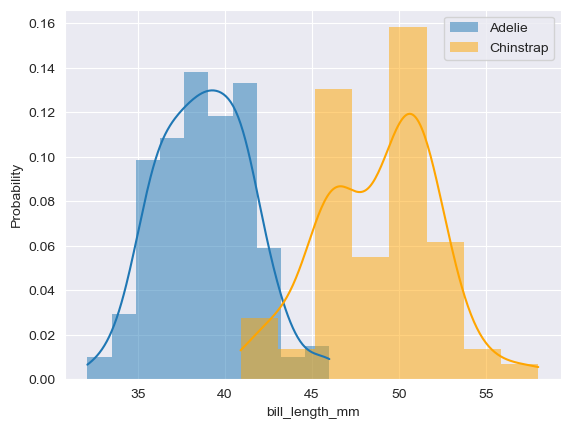

In [156]:
findex = 0 # any value in [0,1,2,3]
c1 = 'Adelie'     # any of ['Adelie', 'Chinstrap', 'Gentoo']
c2 = 'Chinstrap'
sns.histplot(X[y == c1][:,findex], label=c1,
            kde=True, stat="density", linewidth=0)
sns.histplot(X[y == c2][:,findex], label=c2, color = 'orange',
            kde=True, stat="density", linewidth=0)
plt.legend();
plt.xlabel(f_names[findex])
plt.ylabel('Probability')

### Discretization
The alternative to Gaussian Naive Bayes is to discretize the data and use `CategoricalNB`.  
Discretization in Naive Bayes works as follows:

In [157]:
from sklearn.preprocessing import KBinsDiscretizer
Xs = [[-2, 1],
     [-1, 3],
     [ 0, 4],
     [ 2, 5]]
distOrd = KBinsDiscretizer(n_bins=3, encode='ordinal', 
                           strategy='uniform', subsample=None)

distOH = KBinsDiscretizer(n_bins=3, encode='onehot-dense', 
                           strategy='uniform', subsample=None)

distOrd.fit(Xs)
X_ord = distOrd.transform(Xs)
X_ord  

array([[0., 0.],
       [0., 1.],
       [1., 2.],
       [2., 2.]])

In [158]:
distOH.fit(Xs)
X_OH = distOH.transform(Xs)
X_OH 

array([[1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.]])